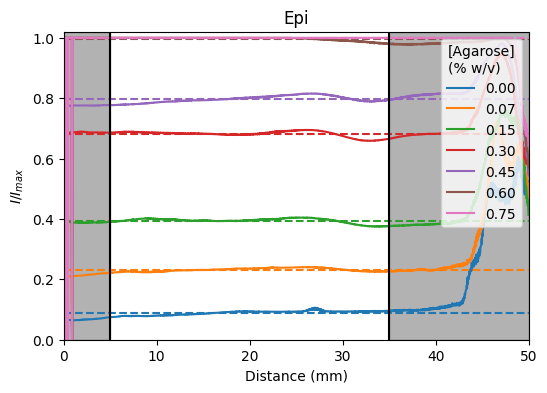

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.0004951879798609812
             x: [ 1.416e+00  8.041e-02  1.693e+00]
           nit: 85
          nfev: 152
 final_simplex: (array([[ 1.416e+00,  8.041e-02,  1.693e+00],
                       [ 1.416e+00,  8.041e-02,  1.693e+00],
                       [ 1.416e+00,  8.041e-02,  1.693e+00],
                       [ 1.416e+00,  8.041e-02,  1.693e+00]]), array([ 4.952e-04,  4.952e-04,  4.952e-04,  4.952e-04]))


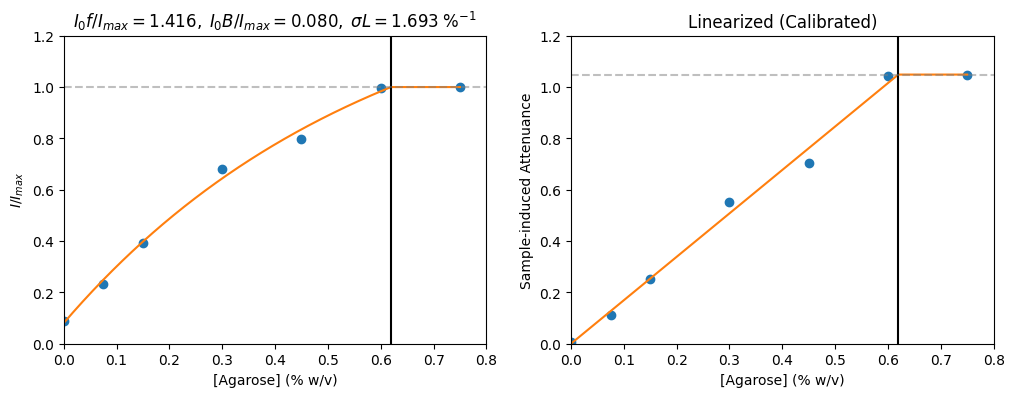

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import qcquant

prefix = 'epi_'
fdir = '../processed'
low = 5.
high = 35.

concs,datas = qcquant.calibrate.collect_data(prefix,fdir)
avgs,fig1,ax1 = qcquant.calibrate.process_data(concs,datas,low,high)
theta,fig2,ax2 = qcquant.calibrate.calibrate(concs,avgs)

np.save('../processed/theta.npy',theta)
fig1.savefig('../figures/calibration_preparation.pdf')
fig1.savefig('../figures/calibration_preparation.png')
fig2.savefig('../figures/calibration_linearization.pdf')
fig2.savefig('../figures/calibration_linearization.png')

$\rho_0$ = 0.0189 $ \\ $ $b_{\;\;}$ = 0.0490 $ \\ $ $k_g$ = 0.1848 $ \\ $ $k_c$ = 0.5331 $ \\ $ $k_d$ = 2.4045 $ \\ $ $x_g$ = 10.5006 $ \\ $ $x_d$ = 13.2804 $ \\ $ 

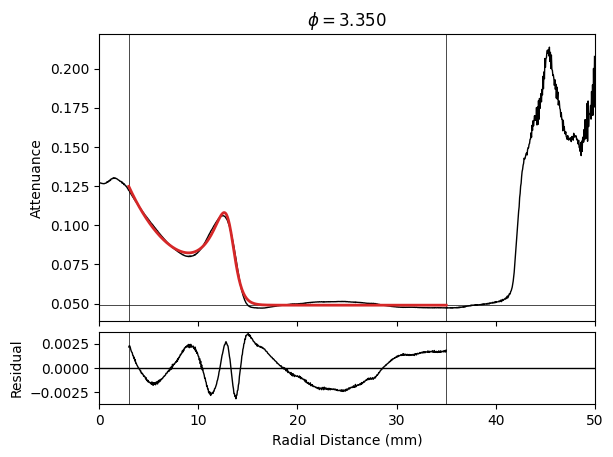

In [7]:
x,y = qcquant.fitting.load('../processed/20240411_5.5H_2.3.txt')
theta = np.load('../processed/theta.npy')

A = qcquant.calibrate.attenuance(y,theta)

xl = 3
xr = 35.
theta = qcquant.fitting.naive(x,A,xl,xr)
success,theta = qcquant.fitting.fit(x,A,xl,xr,guess=theta,repeats=10)
fig,ax = qcquant.fitting.plot(x,A,xl,xr,theta,x_plotmin=0,x_plotmax=50)
qcquant.fitting.report(theta)